In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('.\Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = data.iloc[:, [3, 4]].values
print(X.shape)

(200, 2)


In [4]:
X = data.iloc[:,[3,4]].values
sc = StandardScaler()
X = sc.fit_transform(X)

Epsilon: Giá trị ϵ có thể được chọn bằng cách vẽ một biểu đồ k-distance.  
Đây là biểu đồ thể hiện giá trị khoảng cách trong thuật toán k-Means clustering đến k điểm láng giềng gần nhất
Những khoảng cách này trên đồ thị được sắp xếp theo thứ tự giảm dần.  
Các giá trị tốt của ϵ là vị trí mà biểu đồ này cho thấy xuất hiện một điểm khuỷ tay (elbow point)  

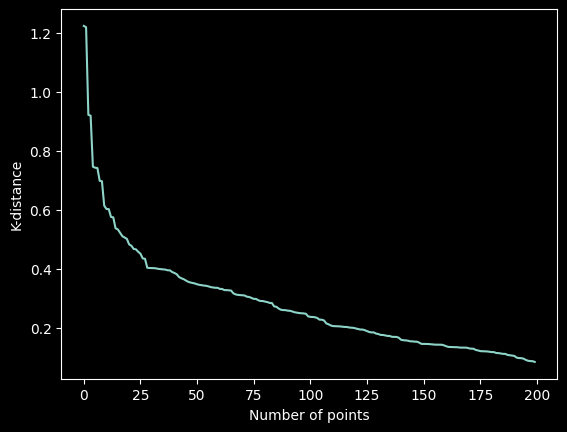

In [5]:
# Xây dựng mô hình k-Means với k=10
k = 10
nbrs = NearestNeighbors(n_neighbors=k).fit(X)

# Ma trận khoảng cách distances: (N, k)
distances, indices = nbrs.kneighbors(X)
avg_distances = np.mean(distances[:, 1:], axis=1)

# sắp xếp các khoảng cách theo thứ tự giảm dần
sorted_distances = np.sort(avg_distances)[::-1]

# vẽ đồ thị K-distance graph
plt.plot(np.arange(len(sorted_distances)), sorted_distances)
plt.xlabel("Number of points")
plt.ylabel("K-distance")
plt.show()

Silhouette score của một điểm dữ liệu được tính bằng cách tính hiệu số giữa khoảng cách trung bình của nó đến các điểm trong cùng cụm và khoảng cách trung bình của nó đến các điểm trong cụm lân cận gần nhất.  
Silhouette score có giá trị từ -1 đến 1.  
Silhouette score thường được sử dụng để đánh giá chất lượng của kết quả phân cụm.  

In [6]:
eps_values = np.arange(0.2, 0.8, 0.05)
min_samples_values = np.arange(2, 10)

best_eps = None
best_min_samples = None
best_num_clusters = -1
best_silhouette_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        model = dbscan.fit(X)
        labels = model.labels_
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if num_clusters > 1:
            silhouette = silhouette_score(X, labels)
            if silhouette > best_silhouette_score:
                best_eps = eps
                best_min_samples = min_samples
                best_num_clusters = num_clusters
                best_silhouette_score = silhouette

print("Best eps: ", best_eps)
print("Best min_samples: ", best_min_samples)
print("Best number of clusters: ", best_num_clusters)
print("Best silhouette score: ", best_silhouette_score)


Best eps:  0.35
Best min_samples:  3
Best number of clusters:  7
Best silhouette score:  0.4756158504262914


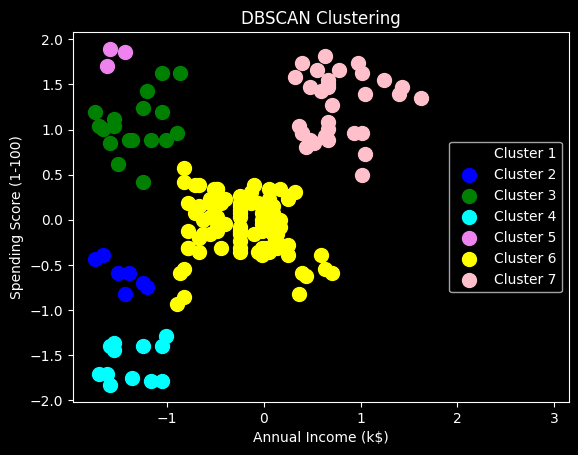

In [7]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
model = dbscan.fit(X)
labels = model.labels_
plt.scatter(X[labels==-1, 0], X[labels==-1, 1], s=100, c='black', label='Cluster 1')
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=100, c='violet', label='Cluster 5')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=100, c='yellow', label='Cluster 6')
plt.scatter(X[labels==5, 0], X[labels==5, 1], s=100, c='pink', label='Cluster 7')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
